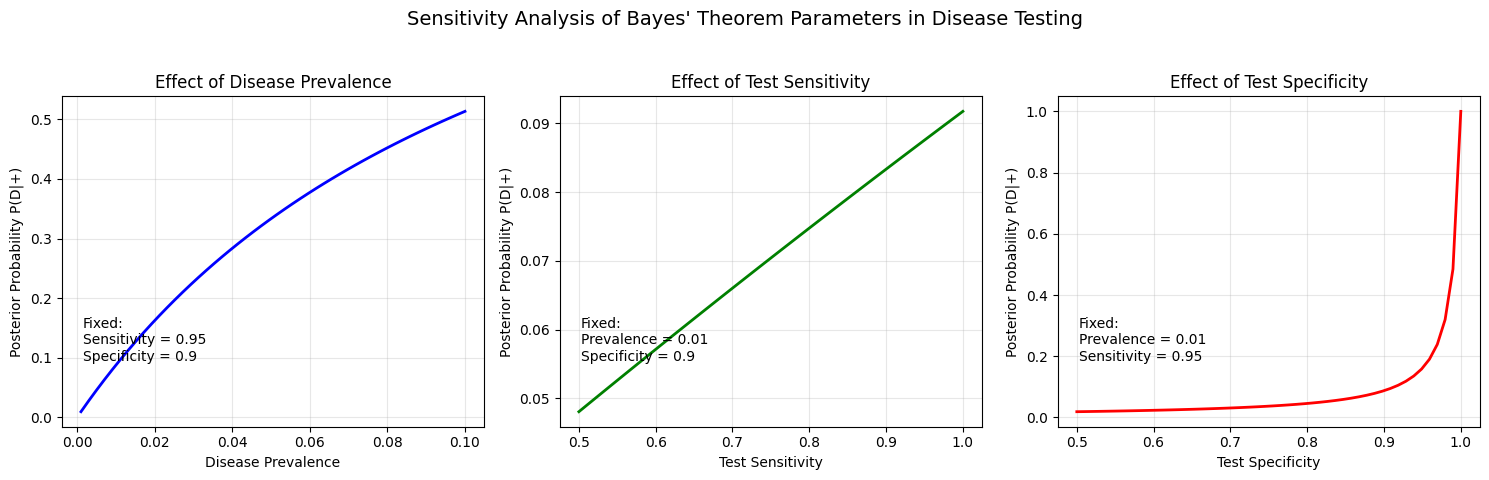

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calc_posterior(prevalence, sens, spec):
    return (sens * prevalence) / (sens * prevalence + (1 - spec) * (1 - prevalence))

base_prevalence = 0.01  
base_sens = 0.95       
base_spec = 0.90      

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(
    'Sensitivity Analysis of Bayes\' Theorem Parameters in Disease Testing', fontsize=14)

prev_range = np.linspace(0.001, 0.1, 50)
post_by_prev = [calc_posterior(p, base_sens, base_spec) for p in prev_range]

ax[0].plot(prev_range, post_by_prev, 'b-', linewidth=2)
ax[0].set_xlabel('Disease Prevalence')
ax[0].set_ylabel('Posterior Probability P(D|+)')
ax[0].set_title('Effect of Disease Prevalence')
ax[0].grid(alpha=0.3)
ax[0].annotate(f'Fixed:\nSensitivity = {base_sens}\nSpecificity = {base_spec}',
               xy=(0.05, 0.2), xycoords='axes fraction')

sens_range = np.linspace(0.5, 1.0, 50)
post_by_sens = [calc_posterior(base_prevalence, s, base_spec)
                for s in sens_range]

ax[1].plot(sens_range, post_by_sens, 'g-', linewidth=2)
ax[1].set_xlabel('Test Sensitivity')
ax[1].set_ylabel('Posterior Probability P(D|+)')
ax[1].set_title('Effect of Test Sensitivity')
ax[1].grid(alpha=0.3)
ax[1].annotate(f'Fixed:\nPrevalence = {base_prevalence}\nSpecificity = {base_spec}',
               xy=(0.05, 0.2), xycoords='axes fraction')

spec_range = np.linspace(0.5, 1.0, 50)
post_by_spec = [calc_posterior(base_prevalence, base_sens, s)
                for s in spec_range]

ax[2].plot(spec_range, post_by_spec, 'r-', linewidth=2)
ax[2].set_xlabel('Test Specificity')
ax[2].set_ylabel('Posterior Probability P(D|+)')
ax[2].set_title('Effect of Test Specificity')
ax[2].grid(alpha=0.3)
ax[2].annotate(f'Fixed:\nPrevalence = {base_prevalence}\nSensitivity = {base_sens}',
               xy=(0.05, 0.2), xycoords='axes fraction')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

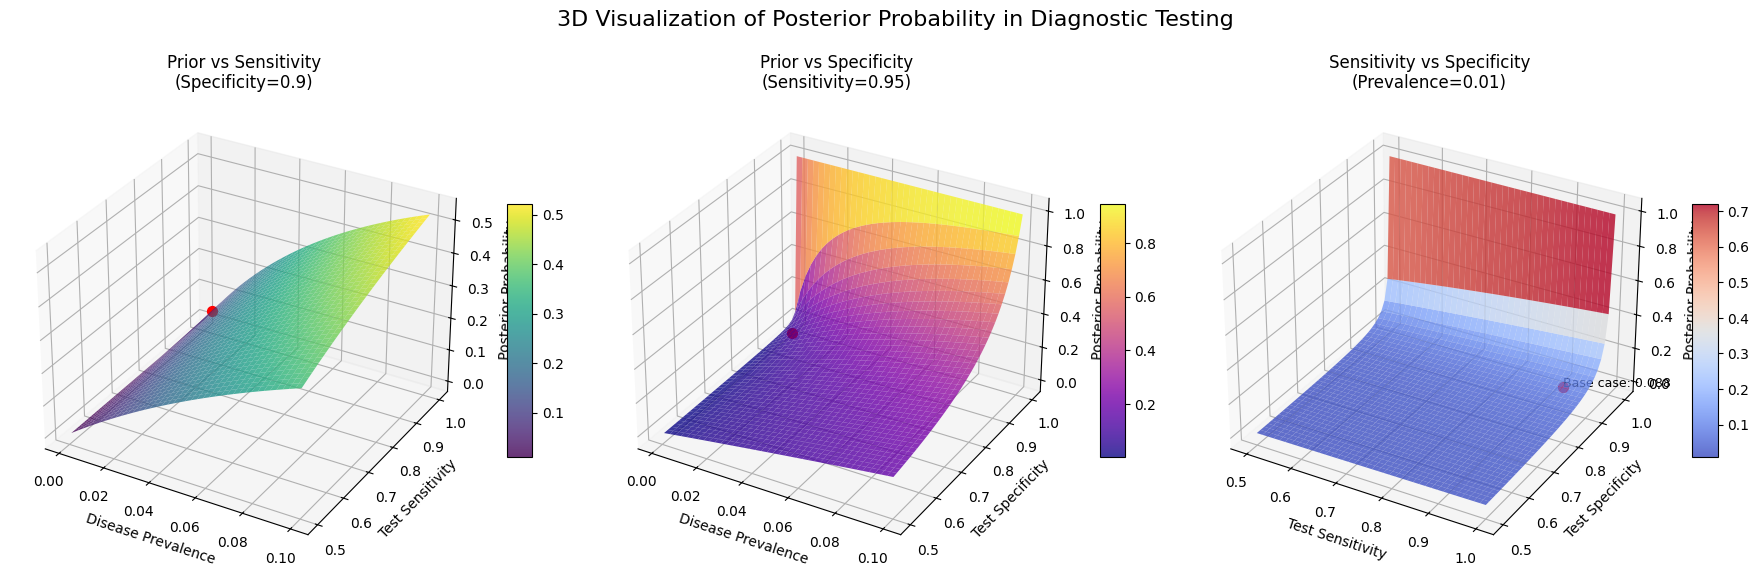

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def posterior_probability(prevalence, sensitivity, specificity):
    """Calculate posterior probability P(Disease|Positive) using Bayes' theorem"""
    numerator = sensitivity * prevalence
    denominator = (sensitivity * prevalence) + \
        ((1 - specificity) * (1 - prevalence))
    return numerator / denominator


resolution = 40
prevalence_range = np.linspace(0.001, 0.1, resolution) 
sensitivity_range = np.linspace(0.5, 1.0, resolution)  
specificity_range = np.linspace(0.5, 1.0, resolution) 

base_prevalence = 0.01    
base_sensitivity = 0.95  
base_specificity = 0.90  

fig = plt.figure(figsize=(18, 6))
fig.suptitle(
    '3D Visualization of Posterior Probability in Diagnostic Testing', fontsize=16)

ax1 = fig.add_subplot(131, projection='3d')
P, S = np.meshgrid(prevalence_range, sensitivity_range)
Z1 = np.zeros_like(P)

for i in range(len(sensitivity_range)):
    for j in range(len(prevalence_range)):
        Z1[i, j] = posterior_probability(P[i, j], S[i, j], base_specificity)

surf1 = ax1.plot_surface(P, S, Z1, cmap=cm.viridis, alpha=0.8,
                         linewidth=0, antialiased=True)
ax1.set_xlabel('Disease Prevalence')
ax1.set_ylabel('Test Sensitivity')
ax1.set_zlabel('Posterior Probability')
ax1.set_title(f'Prior vs Sensitivity\n(Specificity={base_specificity})')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(132, projection='3d')
P, Sp = np.meshgrid(prevalence_range, specificity_range)
Z2 = np.zeros_like(P)

for i in range(len(specificity_range)):
    for j in range(len(prevalence_range)):
        Z2[i, j] = posterior_probability(P[i, j], base_sensitivity, Sp[i, j])

surf2 = ax2.plot_surface(P, Sp, Z2, cmap=cm.plasma, alpha=0.8,
                         linewidth=0, antialiased=True)
ax2.set_xlabel('Disease Prevalence')
ax2.set_ylabel('Test Specificity')
ax2.set_zlabel('Posterior Probability')
ax2.set_title(f'Prior vs Specificity\n(Sensitivity={base_sensitivity})')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

ax3 = fig.add_subplot(133, projection='3d')
S, Sp = np.meshgrid(sensitivity_range, specificity_range)
Z3 = np.zeros_like(S)

for i in range(len(specificity_range)):
    for j in range(len(sensitivity_range)):
        Z3[i, j] = posterior_probability(base_prevalence, S[i, j], Sp[i, j])

surf3 = ax3.plot_surface(S, Sp, Z3, cmap=cm.coolwarm, alpha=0.8,
                         linewidth=0, antialiased=True)
ax3.set_xlabel('Test Sensitivity')
ax3.set_ylabel('Test Specificity')
ax3.set_zlabel('Posterior Probability')
ax3.set_title(f'Sensitivity vs Specificity\n(Prevalence={base_prevalence})')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=10)

point_prevalence = base_prevalence
point_sensitivity = base_sensitivity
point_specificity = base_specificity
point_posterior = posterior_probability(
    point_prevalence, point_sensitivity, point_specificity)

ax1.scatter([point_prevalence], [point_sensitivity], [point_posterior],
            color='red', s=50, label='Base case')
ax2.scatter([point_prevalence], [point_specificity], [point_posterior],
            color='red', s=50, label='Base case')
ax3.scatter([point_sensitivity], [point_specificity], [point_posterior],
            color='red', s=50, label='Base case')

ax3.text(point_sensitivity, point_specificity, point_posterior,
         f'Base case: {point_posterior:.3f}', color='black', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()